<h1>How Do I Make a Popular Movie!? Adventures in The Movie Database</h1>

<p>Considering the year we've had in 2020 the plight of the movie industry looks bleak. Due to Covid-19 many movie theaters in the US were forced to completely shutter operations by April and it is very likely that no new movies will be released in theaters until the summer of 2021. Major film studios like Disney, Universal, Sony, and MGM may be able to bounce back from situations like this, but what about smaller production houses and minor film studios? How will they fair in 2021? What can they do to produce a popular and lucrative movies to help boost their bottom line?</p>
<p>What steps can smaller studios take to pad their pockets with as much capital as they'd need to bounce back a success post 2020? Let's take a look at the past to give us some ideas on the following:</p>
<ul>
    <li>What movie genres net the biggest revenue?</li>
    <li>What time of year should a movie be released to net the biggest revenue?</li>
    <li>Are more popular movies always more profitable?</li>
    <li>Should certain actors be hired to guarantee success?</li>
    <li>Should certain directors be hired to guarantee success?</li>
</ul>

<h2>Table of Contents</h2>
<ul>
    <li><a href="#rundown">Quick Data Rundown and Concerns</a></li>
    <ul>
        <li><a href="#mystical">Demystifying the Mystical</a></li>
    </ul>
    <li><a href="#questions">Let's Answer Some Questions</a></li>
    <li><a href="#conclusion">Conclusions - Increased Chance of Success Depends on the Cast, Director, and Genre</a></li>
</ul>

In [3]:
# We first need to import some python packages so that we can work with the data.

import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
# Next let's import the data into a DataFrame and take a look.

df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='rundown'></a><h2>Quick Data Rundown and Concerns</h2>
<p>Right off the bat we can see which columns are going to be of interest in our data set. We're going to want to get a good understanding of <em>popularty</em>, <em>budget</em>, and <em>revenue</em> amongst other things. Some of the columns have more than one value in them, in partciular <em>cast</em> and <em>genre</em>. We may find that we need to split those values up for further analysis. In our original supposition we didn't really note the <em>runtime</em> but now that I see it as an available column we may want to consider doing some analysis that focuses on how <em>runtime</em> affects the net revenue. Speaking of net revenue, there's no column that gives us the amount of profit the movie made; we'll need to calculate this ourselves from the <em>budget</em> and <em>revenue</em> columns. Another thing we didn't think about was competition. We might want to consider breaking up the data in the <em>production_companies</em> column to get an understanding of which of our competitors are the most profitable and around when do they normally release so that we can try to find good windows of time that we can release without a lot of competition. Lastly there are some columns here with values wehre it isn't particularly apparent what they mean. The <em>vote_count</em> and <em>vote_average</em> columns seem like they may be important but what are they? I think first we'll need to do a little internet reserach to determine what these columns even are.</p>

<a id="mystical"></a><h3>Demystifying the Mystical</h3>
<p>I suppose <em>mystical</em> is a bit dramatic but we're looking at movie data so why not add an air of drama. The data for this project was gifted to us from Kaggle and per the data gods at Kaggle this data originally came from <a href="https://www.themoviedb.org/?language=en-US">The Movie Database</a>. The Movie Database is a website that allows users to sign up in order to rate movies. It also provides a lot of basic information on many different movie titles, but the user functionality is where the missing understanding lies. TMDB users vote on their favorite movies using a 10 star rating. This data may or may not be of interest to us since we already have the <em>populatity</em> score, but it may be interesting to see how the <em>vote_average</em> measures up to the <em>popularity</em> score.</p>
<p>Let's start our analysis by:</p>
<ul>
    <li>creating and populating a <em>profit</em> column</li>
    <li>doing a preliminary comparison of <em>popularity</em> to <em>profit</em></li>
    <li>doing a preliminary comparison of <em>popularity</em> to <em>budget</em></li>
    <li>categorizing the <em>release_date</em> into a <em>season</em></li>
    <li>doing a preliminary comparison of <em>season</em> to <em>profit</em></li>
    <li>categorizing the <em>release_date</em> into a <em>month</em></li>
    <li>doing a preliminary comparison of <em>month</em> to <em>profit</em></li>
</ul>

In [5]:
# Let's take a look to see how many records we have so we can determine if any data is missing
# and if any cleanup is required.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Genres, Cast, and Director are missing data.
# This is a bit unacceptable since we already plan to do comparisons based on those columns.
# Let's get rid of these rows that are missing this info.

df = df.dropna(subset = ['genres', 'cast', 'director'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10732 non-null  int64  
 1   imdb_id               10727 non-null  object 
 2   popularity            10732 non-null  float64
 3   budget                10732 non-null  int64  
 4   revenue               10732 non-null  int64  
 5   original_title        10732 non-null  object 
 6   cast                  10732 non-null  object 
 7   homepage              2893 non-null   object 
 8   director              10732 non-null  object 
 9   tagline               8002 non-null   object 
 10  keywords              9307 non-null   object 
 11  overview              10730 non-null  object 
 12  runtime               10732 non-null  int64  
 13  genres                10732 non-null  object 
 14  production_companies  9773 non-null   object 
 15  release_date       

In [7]:
# Production companies is also missing data but we'll create another DataFrame for analysis if we need it.
# For our initial analysis production company isn't so important.
# We need to create our profit column but it's not as simple as subtracting budget from revenue.
# In order to get an apples to apples comparison we're going to calculate the value as a percentage.
# Since a division by 0 may end up being a thing let's look at some standard info on our columns.

df[['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'release_year']].describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,10732.000000,1.073200e+04,1.073200e+04,10732.000000,10732.000000,10732.000000
mean,0.652609,1.480506e+07,4.031622e+07,102.467853,5.964620,2001.260436
std,1.004757,3.106345e+07,1.176476e+08,30.492619,0.930286,12.819831
min,0.000188,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.210766,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,0.387136,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,0.720621,1.600000e+07,2.500000e+07,112.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [8]:
# Ok some of these values don't really look usable; some have a budget lower than 0.
# It'd actually be better if those values were dropped from the data set all together.
# I don't think it's actually possible for a movie to have a negative budget; any such movie would never profit.

df.drop(df[df['budget'] <= 0.0].index, inplace = True)
df[['budget', 'revenue']].describe()

,budget,revenue
count,5.154000e+03,5.154000e+03
mean,3.082808e+07,8.051614e+07
std,3.892822e+07,1.596631e+08
min,1.000000e+00,0.000000e+00
25%,6.000000e+06,0.000000e+00
50%,1.750000e+07,2.111699e+07
75%,4.000000e+07,8.995000e+07
max,4.250000e+08,2.781506e+09


In [9]:
# That's a bit better but we're going to end up with some negative profit and that's fine.
# Let's create our profit column.

df['profit'] = pd.to_numeric(((df['revenue'] / df['budget']).fillna(-1)).round(0), errors = 'coerce', downcast = 'signed')
df['profit'].describe()

count    5.154000e+03
mean     2.228537e+02
std      1.421859e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      1.018619e+06
Name: profit, dtype: float64

In [10]:
# I'd also noticed that our release date is an object, but we're going to need to get the month from it.
# Additionally this data goes back to 1960 but times have changed. 
# The fact that the most recent data here is 2015 is a bummer, but let's look at recent info.
# Let's look at 10 years worth from 2005 - 2015 and exclude any data from before 2005.

df['release_date'] = pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Looks like pandas already has built in functionality to get the month.

df['release_month'] = df['release_date'].dt.month
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,10,6


In [12]:
df.drop(df[df['release_year'] < 2005].index, inplace = True)
df['release_year'].describe()

count    2588.000000
mean     2010.113601
std         3.066245
min      2005.000000
25%      2008.000000
50%      2010.000000
75%      2013.000000
max      2015.000000
Name: release_year, dtype: float64

In [13]:
# Now that the data is more refined we also want to categorize each month into a season.
# Let's add new columns corresponding with winter, spring, summer, and autumn.
# Based on general knowledge we'd assume that summer and winter would be profitable seasons but let's verify.

conditions = [
    (df['release_month'] >= 3) & (df['release_month'] <= 5),
    (df['release_month'] >= 6) & (df['release_month'] <= 8),
    (df['release_month'] >= 9) & (df['release_month'] <= 11),
    (df['release_month'] >= 1) & (df['release_month'] <= 2),
    (df['release_month'] == 12)
]
values = ['Spring', 'Summer', 'Autumn', 'Winter', 'Winter']
df['season'] = np.select(conditions, values)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month,season
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,10,6,Summer


In [14]:
# I guess lastly we should divide the movies up into profitability buckets.

buckets = [-1, 0.000000e+00, 1.000000e+00, 3.000000e+00, 2.228537e+02, 1.018619e+06]
bnames = ['in-the-red', 'break-even', 'in-the-black', 'movie-gold', 'blockbuster']
df['profitability_rating'] = pd.cut(df['profit'], buckets, labels = bnames)
df['profitability_rating'].unique()

['movie-gold', 'in-the-black', 'break-even', 'in-the-red', 'blockbuster']
Categories (5, object): ['in-the-red' < 'break-even' < 'in-the-black' < 'movie-gold' < 'blockbuster']

In [15]:
# Before we start to plot out our columns we should check for and remove duplicates.

df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 7822
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2587 non-null   int64         
 1   imdb_id               2586 non-null   object        
 2   popularity            2587 non-null   float64       
 3   budget                2587 non-null   int64         
 4   revenue               2587 non-null   int64         
 5   original_title        2587 non-null   object        
 6   cast                  2587 non-null   object        
 7   homepage              1378 non-null   object        
 8   director              2587 non-null   object        
 9   tagline               2214 non-null   object        
 10  keywords              2353 non-null   object        
 11  overview              2587 non-null   object        
 12  runtime               2587 non-null   int64         
 13  genres            

<a id="questions"></a><h2>Let's Answer Some Questions</h2>
<p>Let's start by finding out if more profitable movies are more popular.</p>

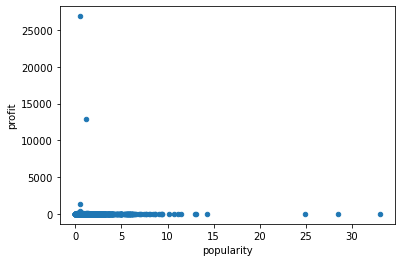

In [16]:
df.plot(x='popularity', y='profit', kind='scatter');

<p>Now that I take a look, is this <em>popularity</em> value actually useless? There appears to be no correlation between popularity of a movie and it's profitability. I didn't really explore these values earlier but when I look back at the standard statistics we got before, it looks like the min value is below 0 and the max value is above 32. The third quartile is at ~ 0.73 which leads me to believe that this <em>popularity</em> column is not a standardized value that means much of anything from row to row. I'm not sure I believe that there is no correlation between how popular a movie is and how profitable it is.</p>
<p>Thankfully we still have the <em>vote_average</em> column that we researched before. We know for a fact that this is a standardized rating system and a value of 5 for example is going to mean the same for all rows. Let's try to answer this question with the <em>vote_average</em> value instead.</p>

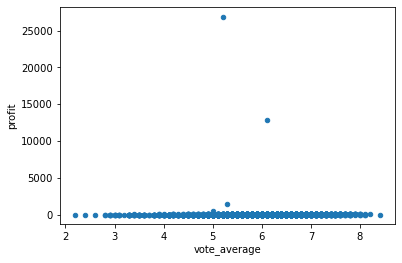

In [17]:
df.plot(x = 'vote_average', y = 'profit', kind = 'scatter');

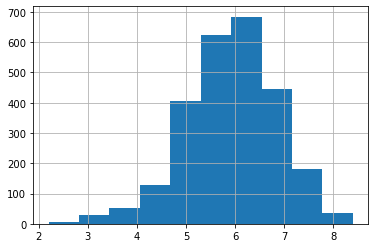

In [18]:
df['vote_average'].hist();

<p>Looks like most of the movies from 2005 - 2015 were only moderately if at all profitable but the ones that really stuck out as being super profitable had a <em>vote_range</em> between 5 and 7. Based on this the answer to our question is <strong>no; more popular movies actually aren't always more profitable.</strong> On the flip side though, movies that aren't at least moderately popular don't do that great either. For an outstandingly profitable movie it looks like the sweet spot is a user rating somewhere between 5 out of 10 and 7 out of 10. Considering the scatter plot though, it looks like movie likability is indeed <strong>not</strong> a deciding factor on profit. I wonder if comparing the buckets would help us to get more insight?</p>

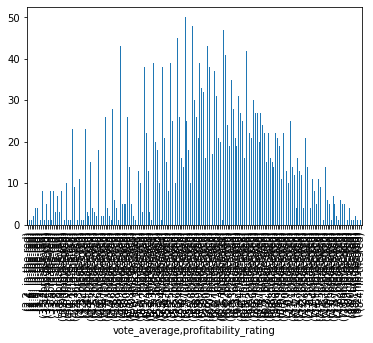

In [19]:
df.groupby(['vote_average'])['profitability_rating'].value_counts().plot(kind = 'bar');

<p>Well that's a bit of a messy visualization. Let's try to sort it out by cleaning up the <em>vote_average</em> column with a supplementary column to give us a nice round number for the vote. The rating system is between 1 and 10 so we can round the values so we end up with less variation.</p>

In [20]:
df['vote'] = df['vote_average'].round(0)
df['vote'].describe()

count    2587.000000
mean        5.938925
std         0.961830
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         8.000000
Name: vote, dtype: float64

In [21]:
df.groupby(['vote'])['profitability_rating'].value_counts()

vote  profitability_rating
2.0   in-the-red                2
3.0   in-the-red               29
      break-even                1
      movie-gold                1
4.0   in-the-red              125
      break-even               13
      in-the-black             10
      movie-gold                6
5.0   in-the-red              292
      break-even               98
      in-the-black             84
      movie-gold               35
      blockbuster               3
6.0   in-the-red              425
      in-the-black            362
      break-even              229
      movie-gold              208
      blockbuster               1
7.0   movie-gold              188
      in-the-red              146
      in-the-black            146
      break-even               83
8.0   movie-gold               51
      in-the-red               26
      in-the-black             19
      break-even                4
Name: profitability_rating, dtype: int64

<p>Doesn't look like there were many blockbusters in our data, but even movies with a user rating as low as 3 were able to break even. Seeing that we have blockbusters among those movies with a user rating of 5 and again of 6 I feel reassured that the bizarre looking scatter plot above wasn't incorrect. It doesn't matter if users loved you or hated you, you can end up in the red just as easily. And above a user rating of 2 you can hope to break even or even produce some movie gold! <strong>Well now we know our small production house doesn't have to make a super popular movie to turn a profit</strong>, but what can we do to help turn a profit?</p>
<p>Let's see if release time of year has anything to do with it.</p>

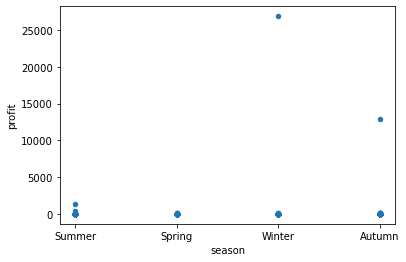

In [22]:
df.plot(x = 'season', y = 'profit', kind = 'scatter');

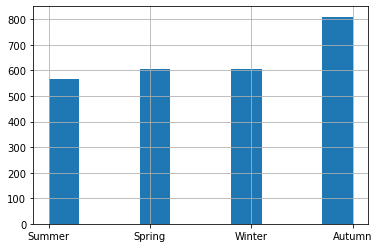

In [23]:
df['season'].hist();

<p>Another bizarre looking scatter plot. Again there appears to be no real correlation between what season a movie is released and how profitable it is, but we do have some outliers in winter and autumn. It looks like spring is going to be the least likely time to make a ton of money probably. Something that is interesting about the scatter plot in relation to the histogram is that it looks like a lot of movies were released in the autumn, but the highest profit outlier was released in the winter - can we infer that making sure we at least release at a time when less releases are available might help to boost the profit a bit?</p>
<p>Let's look at the bucket spread to see if we can get some more info.</p>

In [24]:
df.groupby(['season'])['profitability_rating'].value_counts()

season  profitability_rating
Autumn  in-the-red              350
        in-the-black            165
        movie-gold              149
        break-even              145
        blockbuster               1
Spring  in-the-red              261
        in-the-black            149
        movie-gold              102
        break-even               92
Summer  in-the-red              187
        in-the-black            158
        movie-gold              123
        break-even               96
        blockbuster               2
Winter  in-the-red              247
        in-the-black            149
        movie-gold              115
        break-even               95
        blockbuster               1
Name: profitability_rating, dtype: int64

<p>Again we can see that all year round we have an equal opportunity to lose money on a movie we produce and end up in the red.</p>
<p>My head is telling me a pie chart of just the autumn values might be interesting to look at but I already know that looking at pie charts isn't going to help me see what's postulating in my mind. Mathematically speaking any category above break even means a profit and 460 movies out of 810 made a profit in the autumn (57%).</p>
<p>In the spring that number sinks to 251 out of 604 (42%). 
<br/>But in the summer we're talking 379 out of 566 (67%).
<br/>Then in the winter it's 360 out of 607 (59%).</p>
<p>So some quick calculator math confirms what I think I saw in the scatter plot. That the spring wasn't nearly as profitable as the rest of the seasons and that the winter was slightly more profitable than the autumn. I had postulated that our winter outlier was possibly so profitable because it came during a time when less releases were available, and if I look at these percentages, the summer data makes me believe that this is a phenomenon that is indeed of note. The summer looks to be the most profitable out of all of the seasons. We didn't see a gigantic profit movie in the summer like we did in the winter but the winter only had 1 movie that could be considered a blockbuster while the summer has 2. Additionally in the summer only 566 movies were released. Out of the 3 seasons, it has the least number of overall releases. I really am starting to think that if we release during a time when less releases are happening, i.e. when we have less competition, we may be able to net more profit!</p>
<p>Now I feel like we're getting somewhere. <strong>We need to release during a time when there are less releases.</strong></p>
<p>Let's just dig a little deeper and see if any specific months stand out.</p>

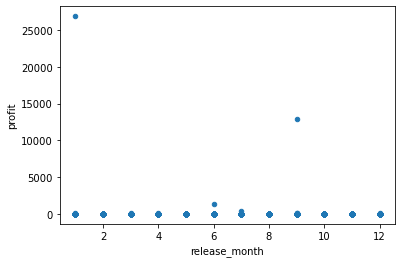

In [25]:
df.plot(x = 'release_month', y = 'profit', kind = 'scatter');

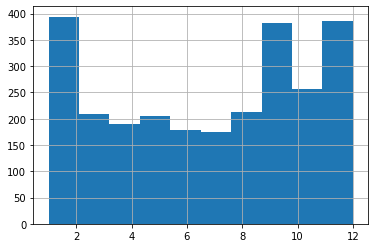

In [26]:
df['release_month'].hist();

<p>A lot of reinforcing what we already saw in the season comparison but it looks like those blockbusters were released in January, June, July, and Septmber.</p>
<p>Now for something more complex; actors, directors, and genres. Those columns have multiple values in them and they need to be split up. Let's do that. Let's create a new actors DataFrame, directors DataFrame, and genres DataFrame.</p>

In [27]:
actors = df[['id', 'cast', 'profit', 'profitability_rating']].copy().set_index('id')
actors.head(1)

,cast,profit,profitability_rating
id,,,
135397,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,10,movie-gold


In [28]:
actor = actors['cast'].str.split('|').apply(pd.Series, 1).stack()
actor.name = 'cast_member'
actor

id       
135397  0            Chris Pratt
        1    Bryce Dallas Howard
        2            Irrfan Khan
        3      Vincent D'Onofrio
        4          Nick Robinson
                    ...         
39561   3      Magdalena GÃ³rska
        4         Tomasz Karolak
36443   0      George H. W. Bush
        1         George W. Bush
        2          Chris Bennett
Name: cast_member, Length: 12839, dtype: object

In [29]:
actors.join(actor)

cast  profit  \
id                                                                    
135397 0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...      10   
       1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...      10   
       2  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...      10   
       3  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...      10   
       4  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...      10   
...                                                     ...     ...   
39561  3  Piotr Adamczyk|Magdalena Boczarska|Maria Gladk...       0   
       4  Piotr Adamczyk|Magdalena Boczarska|Maria Gladk...       0   
36443  0     George H. W. Bush|George W. Bush|Chris Bennett       0   
       1     George H. W. Bush|George W. Bush|Chris Bennett       0   
       2     George H. W. Bush|George W. Bush|Chris Bennett       0   

         profitability_rating          cast_member  
id                                                  
135397 0           movie-gold          Chris Pratt  
       1           movie-gold  Bryce Dallas Howard  
       2           movie-gold          Irrfan Khan  
       3           movie-gold    Vincent D'Onofrio  
       4           movie-gold        Nick Robinson  
...                       ...                  ...  
39561  3           in-the-red    Magdalena GÃ³rska  
       4           in-the-red       Tomasz Karolak  
36443  0           in-the-red    George H. W. Bush  
       1           in-the-red       George W. Bush  
       2           in-the-red        Chris Bennett  

[12839 rows x 4 columns]

<p>So what did we do here? Well I know how to complete this kind of split in SQL but not so much in pandas so I Google searched, "how to create a new data frame from an old data frame with specific columns," "how to set the index of a dataframe to the id," and "how to split a column's values" and this is exactly what we did to get an output with just the actor info. Let's do the same for genres so we can do some comparisons. I'll have to hope to God that there aren't any misspellings or name variations between actors at this point since we haven't particularly learned how to deal with a fuzzy merge in pandas and it's a bit out of scope of the requirements for this project.</p>

In [30]:
genres = df[['id', 'genres', 'profit', 'profitability_rating']].copy().set_index('id')
genre = genres['genres'].str.split('|').apply(pd.Series, 1).stack()
genre.name = 'genre'
genres.join(genre)

genres  profit  \
id                                                            
135397 0  Action|Adventure|Science Fiction|Thriller      10   
       1  Action|Adventure|Science Fiction|Thriller      10   
       2  Action|Adventure|Science Fiction|Thriller      10   
       3  Action|Adventure|Science Fiction|Thriller      10   
76341  0  Action|Adventure|Science Fiction|Thriller       3   
...                                             ...     ...   
13998  1                               Comedy|Drama       0   
12901  0                                Documentary       1   
39561  0                                     Comedy       0   
36443  0                         Comedy|Documentary       0   
       1                         Comedy|Documentary       0   

         profitability_rating            genre  
id                                              
135397 0           movie-gold           Action  
       1           movie-gold        Adventure  
       2           movie-gold  Science Fiction  
       3           movie-gold         Thriller  
76341  0         in-the-black           Action  
...                       ...              ...  
13998  1           in-the-red            Drama  
12901  0           break-even      Documentary  
39561  0           in-the-red           Comedy  
36443  0           in-the-red           Comedy  
       1           in-the-red      Documentary  

[6560 rows x 4 columns]

<p>Now that that is done, let's see if we can decipher maybe if specific actors or genres can help lead us to success.</p>

In [31]:
df['profit'].describe()

count     2587.000000
mean        18.589486
std        586.691161
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max      26882.000000
Name: profit, dtype: float64

<p>Looks like the most profitable movie made an astronimical amount of money in comparison to how much they spent to make it, but is that number even real!! We want to keep our expectations realistic and on average 19 times the budget is the kind of profit we can see. Let's see if we can identify some actors who net that on average.</p>

In [32]:
profitable = actors.join(actor).query('profit >= 19')
profitable.groupby(['cast_member']).size().max()

4

In [33]:
# Looks like any cast member who shows up in here 4 times is going to have had the most consistent success.

profitable['count'] = profitable.groupby('cast_member')['cast_member'].transform('count')
profitable.query('count >= 4')

,,cast,profit,profitability_rating,cast_member,count
id,,,,,,
41436,0,Katie Featherston|David Bierend|Brian Boland|M...,59,movie-gold,Katie Featherston,4
72571,0,Katie Featherston|Sprague Grayden|Lauren Bittn...,41,movie-gold,Katie Featherston,4
82990,0,Katie Featherston|Kathryn Newton|Matt Shively|...,29,movie-gold,Katie Featherston,4
23827,0,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,12890,blockbuster,Katie Featherston,4


<p>Katie Featherstone! Looking at her <em>profit</em> and <em>profitability_rating</em> info Katie has indeed netted profits that exceed 19 times the budget. Let's look at our original DataFrame and see what these movies are that she was in since we have the IDs.</p>

In [34]:
df.loc[(df['id'] == 41436) | (df['id'] == 72571) | (df['id'] == 82990) | (df['id'] == 23827)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month,season,profitability_rating,vote
2022,41436,tt1536044,0.875432,3000000,177512032,Paranormal Activity 2,Katie Featherston|David Bierend|Brian Boland|M...,http://www.paranormalmovie.com/trailer/,Tod Williams,In 2009 you demanded it. Nothing can prepare y...,...,421,5.7,2010,3.000000e+06,1.775120e+08,59,10,Autumn,movie-gold,6.0
3523,72571,tt1778304,0.760193,5000000,205703818,Paranormal Activity 3,Katie Featherston|Sprague Grayden|Lauren Bittn...,http://www.paranormalmovie.com/,Henry Joost|Ariel Schulman,It Runs In The Family,...,406,6.0,2011,4.846990e+06,1.994089e+08,41,10,Autumn,movie-gold,6.0
4534,82990,tt2109184,0.557661,5000000,142817992,Paranormal Activity 4,Katie Featherston|Kathryn Newton|Matt Shively|...,NaN,Henry Joost|Ariel Schulman,It's closer than you think,...,352,5.3,2012,4.748721e+06,1.356406e+08,29,10,Autumn,movie-gold,5.0
7447,23827,tt1179904,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,http://www.paranormalactivity-movie.com/,Oren Peli,What Happens When You Sleep?,...,714,6.1,2007,1.577503e+04,2.033462e+08,12890,9,Autumn,blockbuster,6.0


<p>Paranormal Activity! These are all horror movies. Additionally all of these movies have really small budgets in comparison to their revenue. Wow! Let's check to see if horror movies are indeed profitable.</p>

In [35]:
profitable = genres.join(genre).query('profit >= 19')
profitable.groupby(['genre']).size().max()

21

In [36]:
# Looks like any genre that shows up in here 21 times is going to have had the most consistent success.

profitable['count'] = profitable.groupby('genre')['genre'].transform('count')
profitable.query('count >= 21')

,,genres,profit,profitability_rating,genre,count
id,,,,,,
298312,0,Horror|Thriller,20,movie-gold,Horror,21
277685,0,Horror|Thriller,63,movie-gold,Horror,21
243940,1,Thriller|Horror,19,movie-gold,Horror,21
299245,0,Horror|Thriller,427,blockbuster,Horror,21
242512,0,Horror,21,movie-gold,Horror,21
250546,0,Horror,39,movie-gold,Horror,21
193612,0,Horror,89,movie-gold,Horror,21
288158,1,Thriller|Horror|Drama,27,movie-gold,Horror,21
49018,0,Horror|Thriller,65,movie-gold,Horror,21


<p>Looks like Horror is indeed the winner! It even looks like horror subgenres in general also do pretty well. Let's see if we can settle on a specific subgenre to net us the most profit.</p>

In [37]:
profitable.query('count >= 21').groupby('genres')['genres'].size()

genres
Comedy|Horror                      1
Horror                             6
Horror|Drama|Thriller              1
Horror|Mystery                     1
Horror|Thriller                    7
Horror|Thriller|Mystery            1
Science Fiction|Horror|Thriller    1
Thriller|Horror                    2
Thriller|Horror|Drama              1
Name: genres, dtype: int64

<p>Looks like Horror movies that are also considered Thrillers are a good bet. And looking at the output above one of the blockbusters is infact a Horror/Thriller. For maximum impact the lone Horror/Mystery had the biggest profit but looks like combing the 3 was going a little too far and didn't quite pack the punch Horror/Thriller or Horror/Mystery had.</p>
<p>Lastly we want to take a look at which directors net high profits. It wouldn't do us any good to only look for directors who had high profits if they don't specialize in horror so we need to narrow our directors list down to guys who specialize in horror.</p>

In [38]:
directors = df[['id', 'genres', 'director', 'profit', 'profitability_rating']].copy().set_index('id')
director = directors['director'].str.split('|').apply(pd.Series, 1).stack()
director.name = 'director_name'
horror_directors = directors.join(director).query('genres.str.strip() == "Horror|Mystery" or genres.str.strip() == "Horror|Thriller" or genres.str.strip() == "Thriller|Horror"')
horror_directors

,,genres,director,profit,profitability_rating,director_name
id,,,,,,
243688,0,Horror|Thriller,Gil Kenan,3,in-the-black,Gil Kenan
298312,0,Horror|Thriller,M. Night Shyamalan,20,movie-gold,M. Night Shyamalan
146301,0,Horror|Thriller,Gregory Plotkin,8,movie-gold,Gregory Plotkin
277685,0,Horror|Thriller,Levan Gabriadze,63,movie-gold,Levan Gabriadze
157544,0,Thriller|Horror,Mark Neveldine,0,in-the-red,Mark Neveldine
...,...,...,...,...,...,...
13474,0,Horror|Thriller,Franck Khalfoun,1,break-even,Franck Khalfoun
23202,0,Horror|Thriller,Michael Dougherty,0,in-the-red,Michael Dougherty
10294,0,Horror|Thriller,NimrÃ³d Antal,2,in-the-black,NimrÃ³d Antal


In [39]:
profitable = horror_directors.query('profit >= 19')
profitable.groupby(['director_name']).size().max()

2

In [40]:
profitable

genres                   director  profit  \
id                                                             
298312 0  Horror|Thriller         M. Night Shyamalan      20   
277685 0  Horror|Thriller            Levan Gabriadze      63   
243940 0  Thriller|Horror                 David Gelb      19   
299245 0  Horror|Thriller  Travis Cluff|Chris Lofing     427   
       1  Horror|Thriller  Travis Cluff|Chris Lofing     427   
49018  0  Horror|Thriller                  James Wan      65   
41436  0  Horror|Thriller               Tod Williams      59   
76487  0  Thriller|Horror         William Brent Bell     102   
138843 0  Horror|Thriller                  James Wan      24   
9885   0  Horror|Thriller                Greg McLean      28   
23827  0   Horror|Mystery                  Oren Peli   12890   

         profitability_rating       director_name  
id                                                 
298312 0           movie-gold  M. Night Shyamalan  
277685 0           movie-gold     Levan Gabriadze  
243940 0           movie-gold          David Gelb  
299245 0          blockbuster        Travis Cluff  
       1          blockbuster        Chris Lofing  
49018  0           movie-gold           James Wan  
41436  0           movie-gold        Tod Williams  
76487  0           movie-gold  William Brent Bell  
138843 0           movie-gold           James Wan  
9885   0           movie-gold         Greg McLean  
23827  0          blockbuster           Oren Peli

In [60]:
profitable['count'] = profitable.groupby('director_name')['director_name'].transform('count')
profitable.is_copy = None
profitable.query('count >= 2')

,,genres,director,profit,profitability_rating,director_name,count
id,,,,,,,
49018,0,Horror|Thriller,James Wan,65,movie-gold,James Wan,2
138843,0,Horror|Thriller,James Wan,24,movie-gold,James Wan,2


<p>Looks like James Wan is our director. When it comes to horror that's also a thriller or mystery he has proven that he can achieve repeat success.</p>

<a id="conclusion"></a><h2>Conclusions - Increased Chance of Success Depends on the Cast, Director, and Genre</h2>
<p>After taking a look at 10 years worth of The Movie Database information we've come to the conclusion that:</p>
<ul>
    <li>The popularity of a movie does not determine if the movie would be profitable or not.</li>
    <li>The time of year a movie comes out doesn't really matter so much, but if we can avoid the Spring maybe we should consider it.</li>
    <li>What matters more is if we release the movie around the same time as other movies or not; the less releases that are available during our release time the better.</li>
    <li>Horror movies are quite profitable! They can be made with a shoestring budget which really helps with the profitability. In particular horror with an element of thriller or mystery are consistently profitable.</li>
    <li>Horror movies starring Katie Featherstone are also consistently profitable! Paranormal Activity 5 here we come.</li>
    <li>If he's avaialble we may want to consider James Wan as our director as he has consistently created Horror/Thriller movies with great success!</li>